**Importing Required Libraries**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Loading the Dataset**

In [71]:
wine_data = datasets.load_wine()
wine_df = pd.DataFrame(np.c_[wine_data['data'], wine_data['target']], columns= np.append(wine_data['feature_names'], ['target']))

**Data Cleanining and Pre Processing**

In [72]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [73]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [74]:
#Converting the target variable to distinct classes
le = preprocessing.LabelEncoder()
classes = le.fit_transform(wine_df['target'])

**Exploratory Data Analysis**

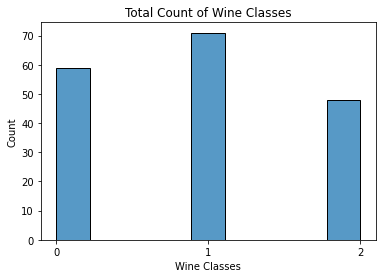

In [75]:
sns.histplot(classes)
plt.xticks([0,1,2])
plt.xlabel('Wine Classes')
plt.title('Total Count of Wine Classes')
plt.show()

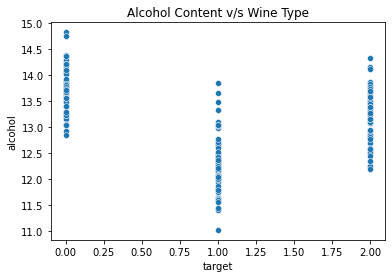

In [76]:
sns.scatterplot(x = 'target', y = 'alcohol', data = wine_df )
plt.title('Alcohol Content v/s Wine Type')
plt.show()

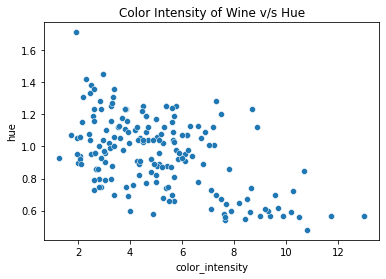

In [77]:
sns.scatterplot(x = 'color_intensity', y = 'hue', data = wine_df )
plt.title('Color Intensity of Wine v/s Hue')
plt.show()

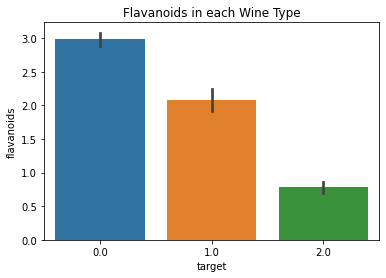

In [78]:
sns.barplot(x = 'target', y = 'flavanoids', data = wine_df)
plt.title('Flavanoids in each Wine Type')
plt.show()

**Step Forward Selection for Feature Selection**

In [79]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [114]:
train_x, test_x, train_y, test_y = train_test_split(wine_df.iloc[:, 0:12], classes, test_size = 0.25, random_state = 123)

In [115]:
fs = sfs(clf, k_features=3, forward=True, verbose=2, scoring='accuracy')
fs = fs.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   50.0s finished

[2020-11-20 12:08:43] Features: 1/3 -- score: 0.6547008547008547[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   47.5s finished

[2020-11-20 12:09:31] Features: 2/3 -- score: 0.9176638176638177[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.2s finished

[2020-11-20 12:10:19] Features: 3/3 -- score: 0.9626780626780626

In [116]:
feat_cols = list(fs.k_feature_idx_)
print(feat_cols)

[4, 6, 9]


In [117]:
#print(wine_df.columns.values[feat_cols])
print("Most Significant Key Features in the Wine Dataset:")
print(*wine_df.columns.values[feat_cols], sep="\n")

Most Significant Key Features in the Wine Dataset:
magnesium
flavanoids
color_intensity


**Split dataset into training and test sets**

In [118]:
train_x, test_x, train_y, test_y = train_test_split(wine_df[['magnesium', 'flavanoids', 'color_intensity']], classes, test_size = 0.25, random_state = 123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(133, 3)
(133,)
(45, 3)
(45,)


**First Classification Model: Logistic Regression**

In [119]:
lr = LogisticRegression(max_iter=1000)
lr_model = lr.fit(train_x, train_y)
lr_pred = lr_model.predict(test_x)
print("Prediction Accuracy Score of Logistic Regression Classifier:")
print(metrics.accuracy_score(test_y, lr_pred), "\n")
print("Confusion Matrix of Logistic Regression Classifier:")
print(metrics.confusion_matrix(test_y, lr_pred), "\n")
print("Classification Report of Logistic Regression Classifier:")
print(metrics.classification_report(test_y, lr_pred))

Prediction Accuracy Score of Logistic Regression Classifier:
0.8666666666666667 

Confusion Matrix of Logistic Regression Classifier:
[[ 8  3  0]
 [ 2 12  0]
 [ 0  1 19]] 

Classification Report of Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.75      0.86      0.80        14
           2       1.00      0.95      0.97        20

    accuracy                           0.87        45
   macro avg       0.85      0.84      0.85        45
weighted avg       0.87      0.87      0.87        45



**Second Classification Model: Decision Tree**

Prediction Accuracy Score of Decision Tree Classifier:
0.9777777777777777 

Confusion Matrix of Decision Tree Classifier:
[[11  0  0]
 [ 1 13  0]
 [ 0  0 20]] 

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45
 

Decision Tree Graph


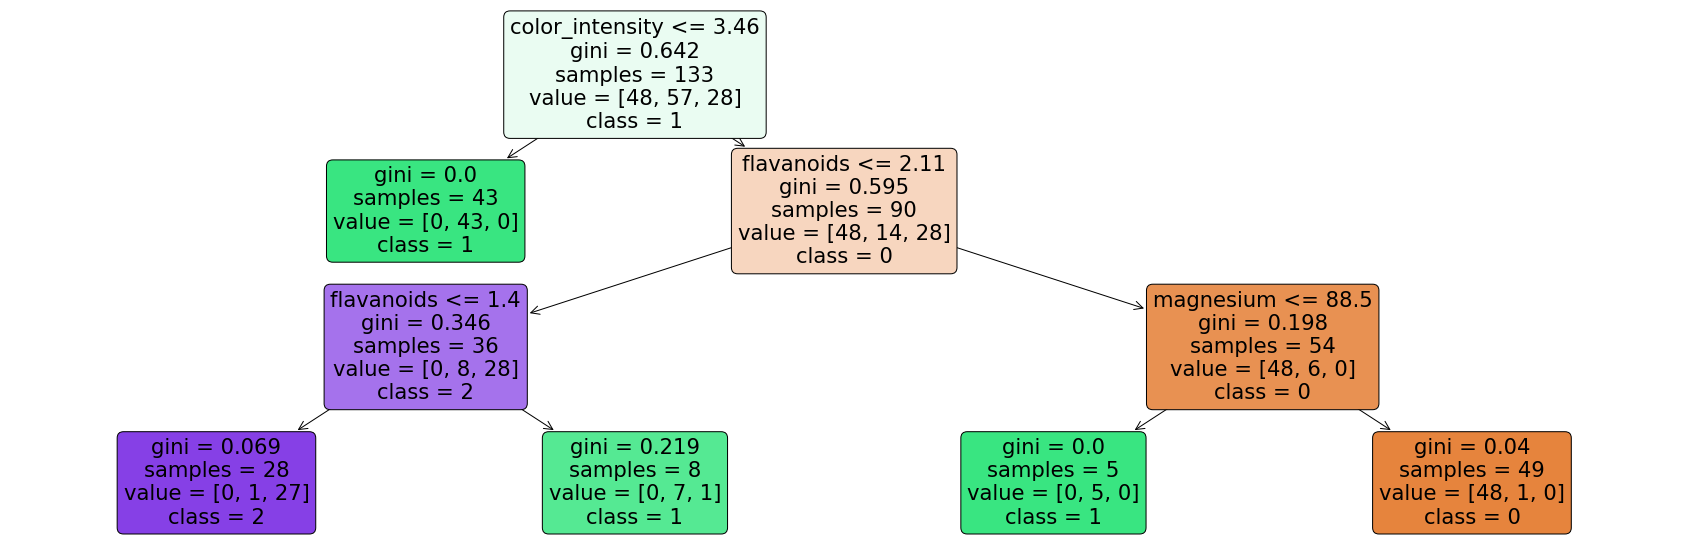

In [109]:
dt = DecisionTreeClassifier(max_depth = 3)
dt = dt.fit(train_x, train_y)
dt_pred = dt.predict(test_x)
print("Prediction Accuracy Score of Decision Tree Classifier:")
print(metrics.accuracy_score(test_y, dt_pred), "\n")
print("Confusion Matrix of Decision Tree Classifier:")
print(metrics.confusion_matrix(test_y, dt_pred), "\n")
print("Classification Report of Decision Tree Classifier:")
print(metrics.classification_report(test_y, dt_pred), "\n")
print("Decision Tree Graph")
plt.figure(figsize=(30,10))
plot = plot_tree(dt, feature_names = train_x.columns.values.tolist(), class_names=['0','1','2'], filled=True, rounded=True)

**Third Classification Model: Random Forest Classifier**

In [105]:
rf = RandomForestClassifier(n_estimators=1000, random_state = 123)
rf_model = rf.fit(train_x, train_y)
rf_pred = rf_model.predict(test_x)
print("Accuracy Score of Random Forest Classifier:")
print(metrics.accuracy_score(test_y, rf_pred), "\n")
print("Confusion Matrix of Random Forest Classifier:")
print(metrics.confusion_matrix(test_y, rf_pred), "\n")
print("Classification Report of Random Forest Classifier:")
print(metrics.classification_report(test_y, rf_pred))

Accuracy Score of Random Forest Classifier:
0.9777777777777777 

Confusion Matrix of Random Forest Classifier:
[[11  0  0]
 [ 1 13  0]
 [ 0  0 20]] 

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

